Useful posts:

http://darribas.org/gds_scipy16/ipynb_md/04_esda.html

http://darribas.org/gds15/content/labs/lab_06.html

In [ ]:
# ! pip install geopandas 

# conda install -c conda-forge geopandas
! pip install geopandas
! pip install descartes
! pip install pysal

# conda install -c anaconda pysal

## Start from below:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
# import pysal as ps
# from pysal.contrib.viz import mapping as maps

In [2]:
# load data
dataPath = "/mnt/data/CES3/"
savePath = "/mnt/results/summarystats/"
if not os.path.exists(savePath):
    os.makedirs(savePath)
savePath2 = "/repos/proj-hsg-env-chal/results/summarystats/"
if not os.path.exists(savePath2):
    os.makedirs(savePath2)

In [3]:
xls = pd.ExcelFile(dataPath+"CES3 - Bay Area.xlsx")
sheets = xls.sheet_names
print(sheets)

df = pd.read_excel(xls, sheet_name=sheets[0])
df_dict = pd.read_excel(xls, sheet_name=sheets[1],skiprows=range(0,6)).dropna(thresh=2)
df_demo = pd.read_excel(xls, sheet_name=sheets[3], header=None,
                        names=['Census Tract','CES 3.0 Score','CES 3.0 Percentile','CES 3.0 Percentile Range','Total Population',
                               'California County','Age:<10','Age:11-64','Age:>65', 'Race:Hispanic','Race:White','Race:AfricanAmerican',
                               'Race:NativeAmerican','Race:Aisan','Race:Other'],skiprows=[0]).dropna()


# # convert to geopandas
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
# gdf.head()

['CES 3.0 (2018 Update)', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


In [10]:
df_dict.head()

df_dict_temp = df_dict.dropna()
var_bur = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Pollution Burden')]['Variable Name'].drop_duplicates()
var_bur = [v.rstrip() for v in var_bur]
var_bur.insert(0,'Census ID')
var_bur

['Census ID',
 'Ozone',
 'Ozone Pctl',
 'PM2.5',
 'PM2.5 Pctl',
 'Diesel PM',
 'Diesel PM Pctl',
 'Drinking Water',
 'Drinking Water Pctl',
 'Pesticides',
 'Pesticides Pctl',
 'Tox. Release',
 'Tox. Release Pctl',
 'Traffic',
 'Traffic Pctl',
 'Cleanup Sites',
 'Cleanup Sites Pctl',
 'Groundwater Threats',
 'Groundwater Threats Pctl',
 'Haz. Waste',
 'Haz. Waste Pctl',
 'Imp. Water Bodies',
 'Imp. Water Bodies Pctl',
 'Solid Waste',
 'Solid Waste Pctl']

In [11]:
print(len(df))
print(df.columns)
df.head()

1581
Index(['Census ID', 'Census Tract', 'Total Population', 'California County',
       'ZIP', 'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       

Census ID  Census Tract  Total Population California County    ZIP  \
0  6001400100        4001.0              2937          Alameda   94704   
1  6001400200        4002.0              1974          Alameda   94618   
2  6001400300        4003.0              4865          Alameda   94618   
3  6001400400        4004.0              3703          Alameda   94609   
4  6001400500        4005.0              3517          Alameda   94609   

  Nearby City \n(to help approximate location only)   Longitude   Latitude  \
0                                          Berkeley -122.231903  37.867595   
1                                           Oakland -122.249576  37.848171   
2                                           Oakland -122.254436  37.840598   
3                                           Oakland -122.257463  37.848211   
4                                           Oakland -122.264745  37.848517   

   CES 3.0 Score   CES 3.0 Percentile  ... Linguistic Isolation Pctl Poverty  \
0       3.970573             1.866566  ...                 28.622850     7.6   
1       1.810257             0.252239  ...                  0.000000    11.2   
2      12.041135            17.631479  ...                 54.939341    14.3   
3      10.912634            15.020810  ...                 16.651113    16.8   
4      18.549441            34.581914  ...                 16.651113    25.1   

   Poverty Pctl  Unemployment  Unemployment Pctl  Housing Burden  \
0      3.570082           NaN                NaN             8.5   
1      8.988058           2.2           1.129585             4.0   
2     14.833438           8.8          45.970301            16.0   
3     19.949717           3.3           3.553750            15.3   
4     36.379635           6.5          24.660490            19.9   

   Housing Burden Pctl  Pop. Char.   Pop. Char. Score  Pop. Char. Pctl  
0             8.123889     8.192184          0.849584         0.819776  
1             0.774308     4.697429          0.487155         0.063060  
2            39.870526    30.040353          3.115385        20.267373  
3            36.481340    27.968623          2.900533        17.379241  
4            58.644326    49.270005          5.109628        48.846008  

[5 rows x 58 columns]

In [12]:
# get only the population characterics columns
df_polbur = df[var_bur]
df_polbur

Census ID     Ozone  Ozone Pctl     PM2.5  PM2.5 Pctl  Diesel PM  \
0     6001400100  0.029592    7.579340  8.697944   30.701098  27.436933   
1     6001400200  0.029592    7.579340  8.697944   30.701098  42.190000   
2     6001400300  0.029592    7.579340  8.697944   30.701098  42.190000   
3     6001400400  0.029592    7.579340  8.697944   30.701098  42.190000   
4     6001400500  0.029592    7.579340  8.697944   30.701098  42.190000   
...          ...       ...         ...       ...         ...        ...   
1576  6097154201  0.037785   22.339764  4.506147    1.858782   2.923786   
1577  6097154202  0.035258   16.938395  4.506147    1.858782   0.534523   
1578  6097154302  0.029592    7.579340  6.182866    7.759481   0.645980   
1579  6097154303  0.035258   16.938395  6.182866    7.759481   0.339291   
1580  6097154304  0.035258   16.938395  7.045742   10.753493   0.114246   

      Diesel PM Pctl  Drinking Water  Drinking Water Pctl  Pesticides  ...  \
0          80.958307       70.599583             4.465511    0.000000  ...   
1          94.399502       70.599583             4.465511    0.000000  ...   
2          94.399502       70.599583             4.465511    0.000000  ...   
3          94.399502       70.599583             4.465511    0.000000  ...   
4          94.399502       70.599583             4.465511    0.000000  ...   
...              ...             ...                  ...         ...  ...   
1576        8.550093      381.867873            40.414120  136.148377  ...   
1577        2.115744      385.555355            40.775851    6.804306  ...   
1578        2.588675      699.525840            82.200324    6.009987  ...   
1579        1.144991      259.393431            26.244231    0.139985  ...   
1580        0.273802      564.869415            59.797929    1.373482  ...   

      Cleanup Sites  Cleanup Sites Pctl  Groundwater Threats  \
0              4.50           42.174389                 4.05   
1              0.00            0.000000                20.55   
2              0.90           12.860270                35.25   
3              0.00            0.000000                38.75   
4              3.50           35.078439                21.60   
...             ...                 ...                  ...   
1576          31.00           90.970449                67.00   
1577          23.25           86.045239                39.10   
1578           0.00            0.000000                 4.50   
1579           4.00           39.000365                14.50   
1580          20.00           83.473185                23.00   

      Groundwater Threats Pctl  Haz. Waste  Haz. Waste Pctl  \
0                    27.077127         6.0         97.81279   
1                    71.714664         0.0          0.00000   
2                    85.187024         0.0          0.00000   
3                    87.040715         0.0          0.00000   
4                    73.022178         0.0          0.00000   
...                        ...         ...              ...   
1576                 94.422377         0.0          0.00000   
1577                 87.206223         0.0          0.00000   
1578                 28.715657         0.0          0.00000   
1579                 59.301556         0.0          0.00000   
1580                 74.908971         0.0          0.00000   

      Imp. Water Bodies  Imp. Water Bodies Pctl  Solid Waste  Solid Waste Pctl  
0                     2               29.250497         1.00         32.798868  
1                     0                0.000000         0.00          0.000000  
2                     0                0.000000         0.00          0.000000  
3                     0                0.000000         0.00          0.000000  
4                     0                0.000000         0.00          0.000000  
...                 ...                     ...          ...               ...  
1576                  4               48.795048         4.25         69.1110

In [13]:
# burden to plot on map:
bur_on_map = np.array(df_polbur.columns[1:].tolist())
bur_on_map

array(['Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM',
       'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats',
       'Groundwater Threats Pctl', 'Haz. Waste', 'Haz. Waste Pctl',
       'Imp. Water Bodies', 'Imp. Water Bodies Pctl', 'Solid Waste',
       'Solid Waste Pctl'], dtype='<U24')

In [14]:
gdf = gpd.read_file(dataPath+"CES3June2018Update.shp")
gdf = gdf[gdf['tract'].isin(df['Census ID'])].reset_index(drop=True).rename(columns={'tract': 'Census ID'})

gdf = gdf.merge(df_polbur, on='Census ID')

In [15]:
print(len(gdf))
gdf.head()

1581


Census ID  pop2010   California    ZIP           City   Longitude  \
0  6.085509e+09     4603  Santa Clara  94043  Mountain View -122.074346   
1  6.085510e+09     4688  Santa Clara  94022      Los Altos -122.120112   
2  6.085509e+09     3212  Santa Clara  94306      Palo Alto -122.114454   
3  6.085509e+09     3706  Santa Clara  94043  Mountain View -122.092278   
4  6.085503e+09     4311  Santa Clara  95122       San Jose -121.822135   

    Latitude  CIscore  CIscoreP  ozone  ...  Cleanup Sites  \
0  37.401206    19.89        38  0.035  ...           66.5   
1  37.392783     3.53         1  0.035  ...            6.9   
2  37.406981     7.97         8  0.035  ...            5.3   
3  37.406030    17.20        31  0.035  ...           44.2   
4  37.331408    32.60        64  0.038  ...            4.5   

   Cleanup Sites Pctl  Groundwater Threats  Groundwater Threats Pctl  \
0           97.756293               121.85                 98.013903   
1           50.474279                17.10                 65.921880   
2           45.220722                16.50                 64.581264   
3           95.147756                30.85                 82.224429   
4           42.174389                 3.00                 21.880172   

   Haz. Waste  Haz. Waste Pctl  Imp. Water Bodies  Imp. Water Bodies Pctl  \
0       0.200        60.500463                  5               55.007738   
1       0.060        28.044486                  0                0.000000   
2       0.000         0.000000                  0                0.000000   
3       0.025        15.681186                  4               48.795048   
4       0.100        43.113994                  0                0.000000   

   Solid Waste  Solid Waste Pctl  
0          0.0               0.0  
1          0.0               0.0  
2          0.0               0.0  
3          0.0               0.0  
4          0.0               0.0  

[5 rows x 95 columns]

In [16]:
gdf.columns

Index(['Census ID', 'pop2010', 'California', 'ZIP', 'City', 'Longitude',
       'Latitude', 'CIscore', 'CIscoreP', 'ozone', 'ozoneP', 'pm', 'pmP',
       'diesel', 'dieselP', 'drink', 'drinkP', 'pest', 'pestP', 'RSEIhaz',
       'RSEIhazP', 'traffic', 'trafficP', 'cleanups', 'cleanupsP', 'gwthreats',
       'gwthreatsP', 'haz', 'hazP', 'iwb', 'iwbP', 'swis', 'swisP',
       'Pollution', 'PollutionS', 'PollutionP', 'asthma', 'asthmaP', 'lbw',
       'lbwP', 'cvd', 'cvdP', 'edu', 'eduP', 'ling', 'lingP', 'pov', 'povP',
       'unemp', 'unempP', 'housingB', 'housingBP', 'PopChar', 'PopCharSco',
       'PopCharP', 'Children_u', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p',
       'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct',
       'OBJECTID_1', 'CIdecile', 'CIvigintil', 'Shape_Leng', 'Shape_Area',
       'CES2018_Rn', 'geometry', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Pesticides

## Pollution Burden of CES3 Bay Area

### Visulization of values on map

In [21]:
len(bur_on_map)

24

Ozone
Ozone Pctl
PM2.5
PM2.5 Pctl
Diesel PM
Diesel PM Pctl
Drinking Water
Drinking Water Pctl
Pesticides
Pesticides Pctl
Tox. Release
Tox. Release Pctl
Traffic
Traffic Pctl
Cleanup Sites
Cleanup Sites Pctl


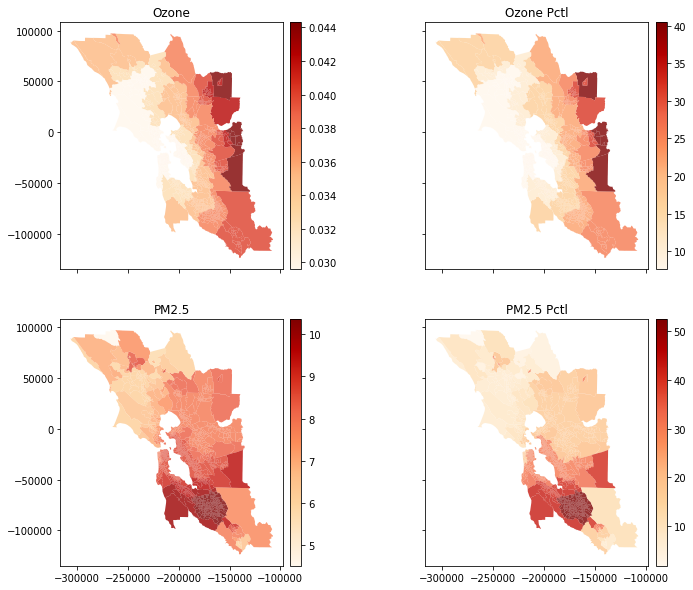

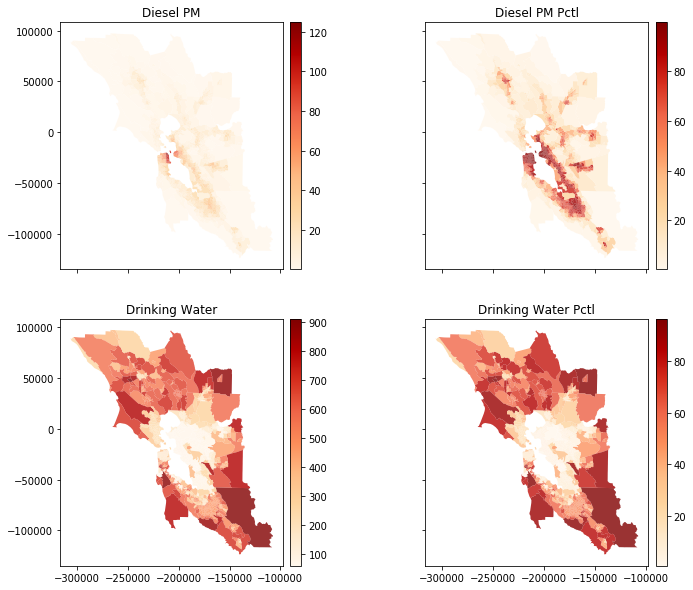

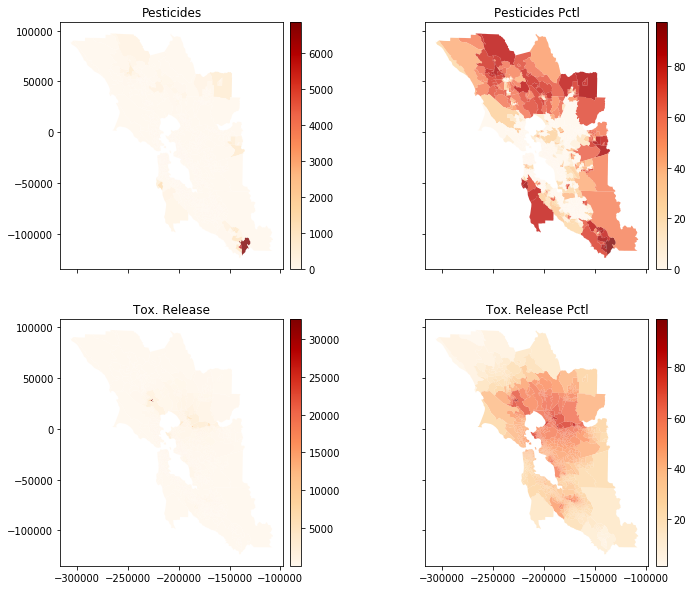

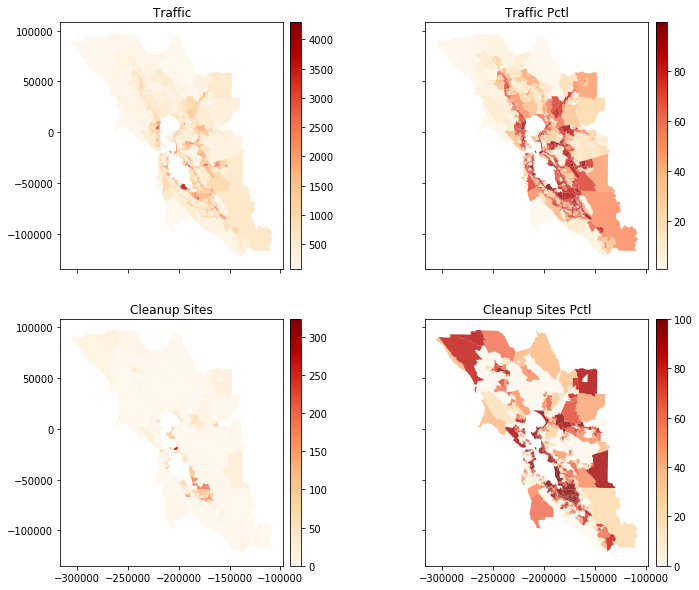

In [23]:
for idx in range(int(len(bur_on_map)/6)):
    pol_bur_idx = range(idx*4,idx*4+4)
    features = bur_on_map[pol_bur_idx]

    ncol = 2
    numPlot = len(features)
    nrow = int(np.ceil(numPlot/ncol))

    fig, axs = plt.subplots(nrow, ncol, figsize=(12,5*nrow),sharex=True, sharey=True, squeeze=True)


    for i,feature in enumerate(features):
        ax = axs[int(i/ncol),i%ncol]
    #     ax = axs[i%nrow,int((i-i%nrow)/nrow)]  % uncomment to plot vertically
        print(feature)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)

        gdf.plot(ax=ax,column=feature,cmap='OrRd', cax=cax, legend=True, alpha=0.8)
        ax.set_title(feature)

    if len(features)<nrow*ncol:
        fig.delaxes(axs[nrow-1][ncol-1])

    ax.set_xlabel('')
    ax.set_ylabel('')
    # plt.show()
    plt.savefig(savePath+"pol_bur_{}.png".format("-".join([str(i) for i in pol_bur_idx])),bbox_inches='tight')
    plt.savefig(savePath2+"pol_bur_{}.png".format("-".join([str(i) for i in pol_bur_idx])),bbox_inches='tight')

### Summary statistics 

In [24]:
print("--Total number of rows--\n{}".format(len(df)))

# summary descriptoin
df[bur_on_map].describe()

--Total number of rows--
1581


Ozone   Ozone Pctl        PM2.5   PM2.5 Pctl    Diesel PM  \
count  1581.000000  1581.000000  1581.000000  1581.000000  1581.000000   
mean      0.033747    14.664771     8.722049    30.785748    26.090377   
std       0.003860     7.166208     1.103740    13.650184    21.318354   
min       0.029592     7.579340     4.506147     1.858782     0.114246   
25%       0.029592     7.579340     7.859585    17.814371    12.090000   
50%       0.032532    11.076540     8.697944    30.701098    20.996665   
75%       0.037785    22.339764     9.536303    40.918164    33.660000   
max       0.044312    40.485376    10.370000    52.607285   124.700000   

       Diesel PM Pctl  Drinking Water  Drinking Water Pctl   Pesticides  \
count     1581.000000     1579.000000          1579.000000  1581.000000   
mean        60.384364      277.941034            27.364855    26.241140   
std         29.560306      203.254859            23.881102   285.040151   
min          0.273802       58.514574             0.686042     0.000000   
25%         35.245800       83.532001             7.296994     0.000000   
50%         64.704418      186.910292            14.107522     0.000000   
75%         88.998133      479.227886            51.016590     0.005642   
max         99.775980      911.504270            96.332793  6855.837061   

       Pesticides Pctl  ...  Cleanup Sites  Cleanup Sites Pctl  \
count      1581.000000  ...    1581.000000         1581.000000   
mean         11.365641  ...      11.482827           37.441148   
std          22.973759  ...      23.642147           35.024114   
min           0.000000  ...       0.000000            0.000000   
25%           0.000000  ...       0.000000            0.000000   
50%           0.000000  ...       3.000000           32.707041   
75%           6.371191  ...      12.000000           69.390733   
max          97.229917  ...     323.750000          100.000000   

       Groundwater Threats  Groundwater Threats Pctl   Haz. Waste  \
count          1581.000000               1581.000000  1581.000000   
mean             24.669260                 50.401920     0.537277   
std              41.445684                 32.978484     1.596933   
min               0.000000                  0.000000     0.000000   
25%               3.000000                 21.880172     0.000000   
50%              12.000000                 54.270109     0.085000   
75%              27.850000                 79.808011     0.285000   
max             597.050000                 99.950348    23.365000   

       Haz. Waste Pctl  Imp. Water Bodies  Imp. Water Bodies Pctl  \
count      1581.000000        1581.000000             1581.000000   
mean         38.411149           3.829222               36.540373   
std          33.808006           4.412001               33.820143   
min           0.000000           0.000000                0.000000   
25%           0.000000           0.000000                0.000000   
50%          31.733086           2.000000               29.250497   
75%          67.933272           7.000000               71.611762   
max          99.962929          19.000000               98.629228   

       Solid Waste  Solid Waste Pctl  
count  1581.000000       1581.000000  
mean      1.560247         18.667205  
std       4.297802         29.586636  
min       0.000000          0.000000  
25%       0.000000          0.000000  
50%       0.000000          0.000000  
75%       1.000000         32.798868  
max      71.500000         99.976421  

[8 rows x 24 columns]

In [29]:
print(df[bur_on_map].describe().T.to_latex(float_format="%.1f")) 

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &    std &  min &   25\% &   50\% &    75\% &     max \\
\midrule
Ozone                    & 1581.0 &   0.0 &    0.0 &  0.0 &   0.0 &   0.0 &    0.0 &     0.0 \\
Ozone Pctl               & 1581.0 &  14.7 &    7.2 &  7.6 &   7.6 &  11.1 &   22.3 &    40.5 \\
PM2.5                    & 1581.0 &   8.7 &    1.1 &  4.5 &   7.9 &   8.7 &    9.5 &    10.4 \\
PM2.5 Pctl               & 1581.0 &  30.8 &   13.7 &  1.9 &  17.8 &  30.7 &   40.9 &    52.6 \\
Diesel PM                & 1581.0 &  26.1 &   21.3 &  0.1 &  12.1 &  21.0 &   33.7 &   124.7 \\
Diesel PM Pctl           & 1581.0 &  60.4 &   29.6 &  0.3 &  35.2 &  64.7 &   89.0 &    99.8 \\
Drinking Water           & 1579.0 & 277.9 &  203.3 & 58.5 &  83.5 & 186.9 &  479.2 &   911.5 \\
Drinking Water Pctl      & 1579.0 &  27.4 &   23.9 &  0.7 &   7.3 &  14.1 &   51.0 &    96.3 \\
Pesticides               & 1581.0 &  26.2 &  285.0 &  0.0 &   0.0 &   0.0 &    0.0 &  6855.8 \\
Pesticides Pct

In [30]:
# Number of NAs
print("--Number of NAs--")
print(df[bur_on_map].isna().sum())

--Number of NAs--
Ozone                        0
Ozone Pctl                   0
PM2.5                        0
PM2.5 Pctl                   0
Diesel PM                    0
Diesel PM Pctl               0
Drinking Water               2
Drinking Water Pctl          2
Pesticides                   0
Pesticides Pctl              0
Tox. Release                 0
Tox. Release Pctl            0
Traffic                     12
Traffic Pctl                12
Cleanup Sites                0
Cleanup Sites Pctl           0
Groundwater Threats          0
Groundwater Threats Pctl     0
Haz. Waste                   0
Haz. Waste Pctl              0
Imp. Water Bodies            0
Imp. Water Bodies Pctl       0
Solid Waste                  0
Solid Waste Pctl             0
dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


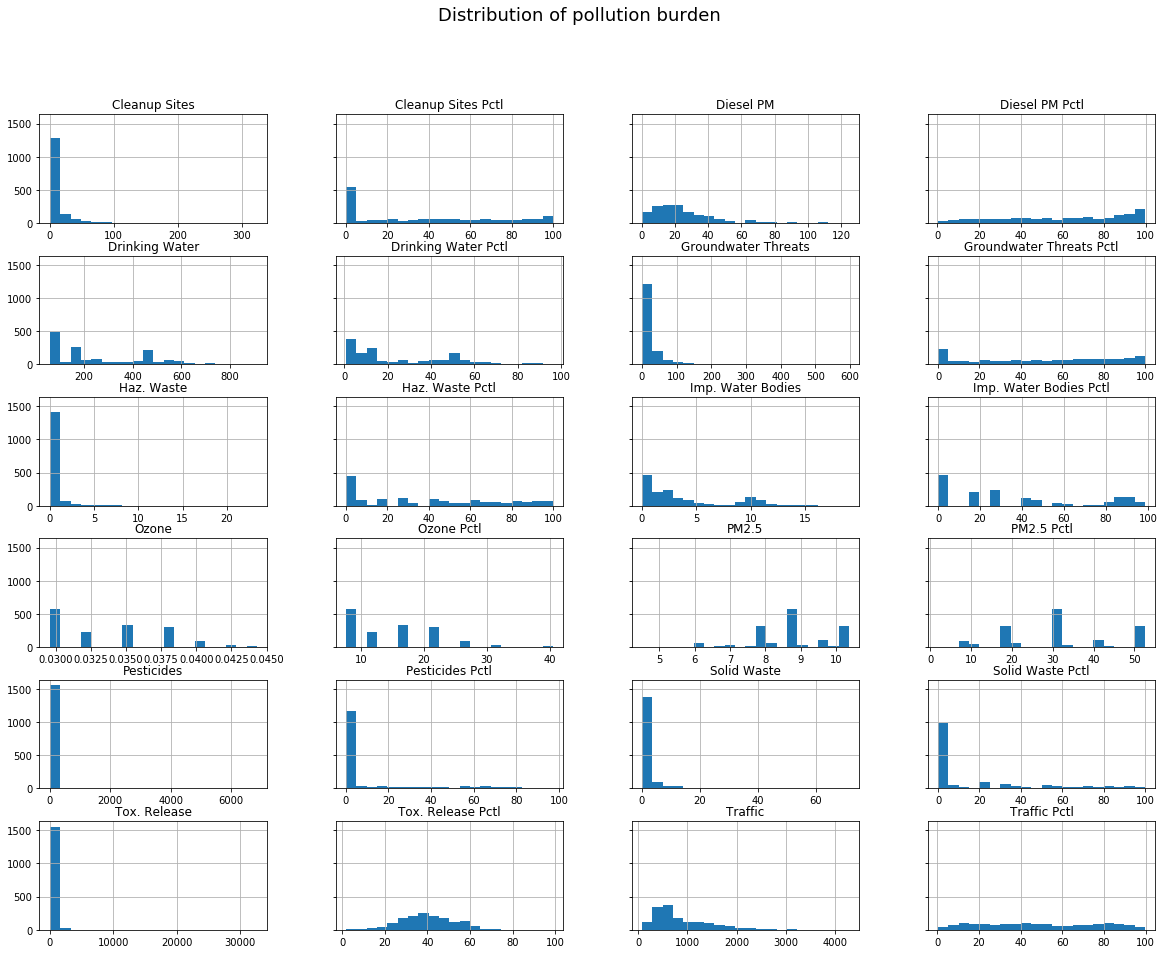

In [36]:
# distribution
fig, ax = plt.subplots(figsize=(20,15))
df[bur_on_map].hist(sharex=False, sharey=True,ax=ax,
                     layout=(6,4),bins=20)
fig.suptitle("Distribution of pollution burden",fontsize=18)
pass
fig.savefig(savePath+"pol_bur_distribution.png",bbox_inches='tight')
fig.savefig(savePath2+"pol_bur_distribution.png",bbox_inches='tight')

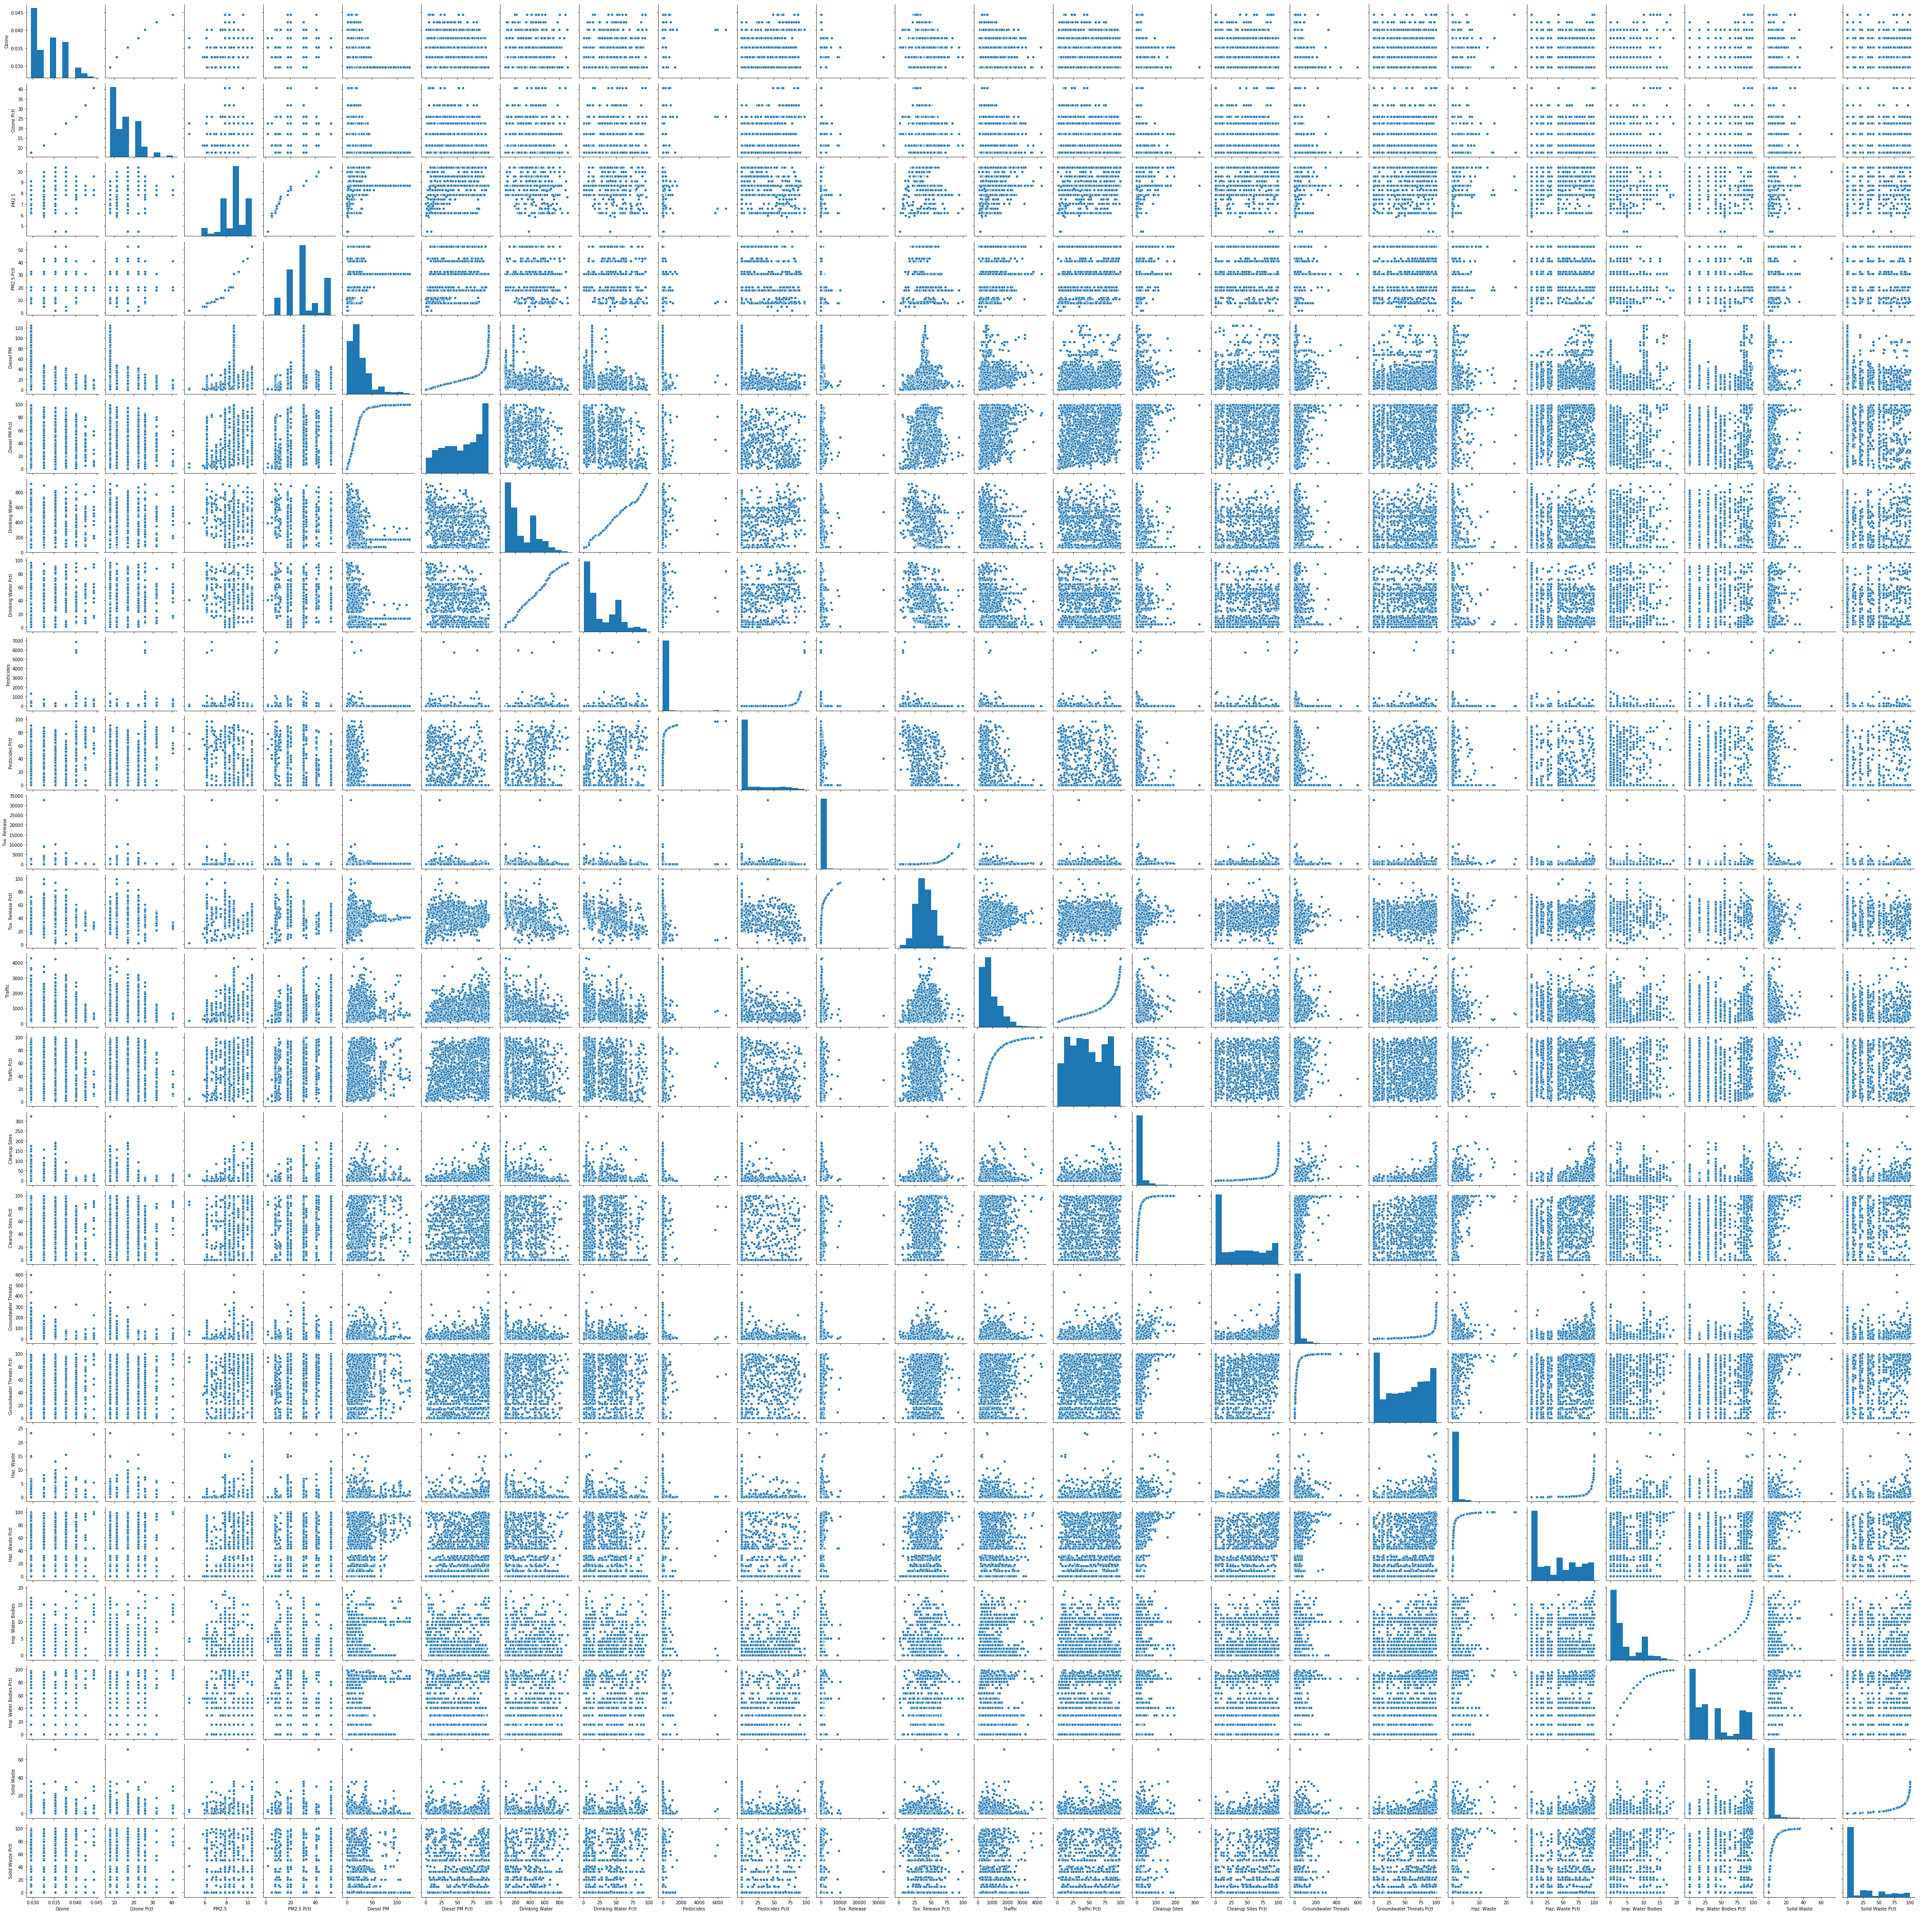

In [37]:
# pairwise relationships
pp = sns.pairplot(df[bur_on_map])
pp.savefig(savePath+"pol_bur_pairwise.png",bbox_inches='tight')
pp.savefig(savePath2+"pol_bur_pairwise.png",bbox_inches='tight')